# Python visualization modules

## Matplotlib 
(17.6K ⭐ on Github)

✔️ Advantages:
- **Fundamental library** for visualization in Python. **Most solid library**.
- With customization, **can do almost anything**.
- **Large community** and a **lot of documentation**.

❌ Drawbacks:
- Syntax can become **heavy and verbose** for some of the more complex graphs
- **Not the best for interactive graphs**

## Seaborn 
(10.9K ⭐ on Github)

✔️ Advantages:
- Perfect for most cases
- Nice plots
- Statistical data visualization

❌ Drawbacks:
- Limited interactivity
- Lack of support for 3D plots

## Plotly
(13.7K ⭐ on Github)

✔️ Advantages:
- **Quickly make interactive plots**
- Easy to **generate dashboards and deploying them on a server like Dash**
- Plotly is also **compatible with Latex**
- Similar to seaborn but interactive

❌ Drawbacks:
- Hard to customize

In [1]:
import plotly.express as px

In [2]:
df = px.data.iris()
fig = px.scatter_matrix(
    df,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species",
)
fig.show()

In [3]:
df = px.data.tips()
fig = px.parallel_categories(
    df, color="size", color_continuous_scale=px.colors.sequential.Inferno
)
fig.show()

In [4]:
df = px.data.gapminder()
fig = px.scatter(
    df,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=60,
)
fig.show()

In [5]:
fig.write_html("gapminder.html")

In [6]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(
    df,
    path=["continent", "country"],
    values="pop",
    color="lifeExp",
    hover_data=["iso_alpha"],
)
fig.show()

In [7]:
df = px.data.carshare()
fig = px.scatter_mapbox(
    df,
    lat="centroid_lat",
    lon="centroid_lon",
    color="peak_hour",
    size="car_hours",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=10,
    mapbox_style="carto-positron",
)
fig.show()

In [8]:
df = px.data.election()
fig = px.scatter_3d(
    df,
    x="Joly",
    y="Coderre",
    z="Bergeron",
    color="winner",
    size="total",
    hover_name="district",
    symbol="result",
    color_discrete_map={"Joly": "blue", "Bergeron": "green", "Coderre": "red"},
)
fig.show()

## Bokeh
(17.7K ⭐ on Github)

Similar to Plotly

✔️ Advantages:
- **Easy to create interactive graphs, web-ready plots**
- As with plotly, **dashboards can be created and deployed on a server**, in this case Bokeh
- Bokeh's dashboards seem to be **faster** at retrieving and displaying data than Plotly's

❌ Drawbacks:
- **Not suitable for 3D plots**
- A little more complicated to learn than Plotly

In [9]:
# import
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

output_notebook()

Loading BokehJS ...

In [10]:
from bokeh.layouts import row

# prepare some data
x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

TOOLTIPS = [
    ("(x, y)", "($x, $y)"),
]

# create three plots with one renderer each
s1 = figure(width=250, height=250, background_fill_color="#fafafa", tooltips=TOOLTIPS)
s1.circle(x, y0, size=12, color="#53777a", alpha=0.8)

s2 = figure(width=250, height=250, background_fill_color="#fafafa")
s2.triangle(x, y1, size=12, color="#c02942", alpha=0.8)

s3 = figure(width=250, height=250, background_fill_color="#fafafa")
s3.square(x, y2, size=12, color="#d95b43", alpha=0.8)

# put the results in a row that automatically adjusts
# to the browser window's width
show(row(children=[s1, s2, s3], sizing_mode="scale_width"))

In [11]:
from bokeh.layouts import layout
from bokeh.models import RangeSlider, Spinner
from bokeh.plotting import figure, show

# prepare some data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [4, 5, 5, 7, 2, 6, 4, 9, 1, 3]

# create plot with circle glyphs
p = figure(x_range=(1, 9), width=500, height=250)
points = p.circle(x=x, y=y, size=30, fill_color="#21a7df")

# set up spinner
spinner = Spinner(
    title="Circle size",
    low=0,
    high=60,
    step=5,
    value=points.glyph.size,
    width=200,
)
spinner.js_link("value", points.glyph, "size")

# set up RangeSlider
range_slider = RangeSlider(
    title="Adjust x-axis range",
    start=0,
    end=10,
    step=1,
    value=(p.x_range.start, p.x_range.end),
)
range_slider.js_link("value", p.x_range, "start", attr_selector=0)
range_slider.js_link("value", p.x_range, "end", attr_selector=1)

# create layout
layout = layout(
    [
        [spinner],
        [range_slider],
        [p],
    ]
)

# show result
show(layout)

## Plotnine (ggplot)
(3.5K ⭐ on Github)

✔️ Advantages:
- Based on **ggplot2, an R plotting system**. Ideal for those coming from R.

❌ Drawbacks:
- A **syntax that differs from the main Python libraries** because Plotnine operates differently from matplotlib.
- **Not as well developed as the main ones**.

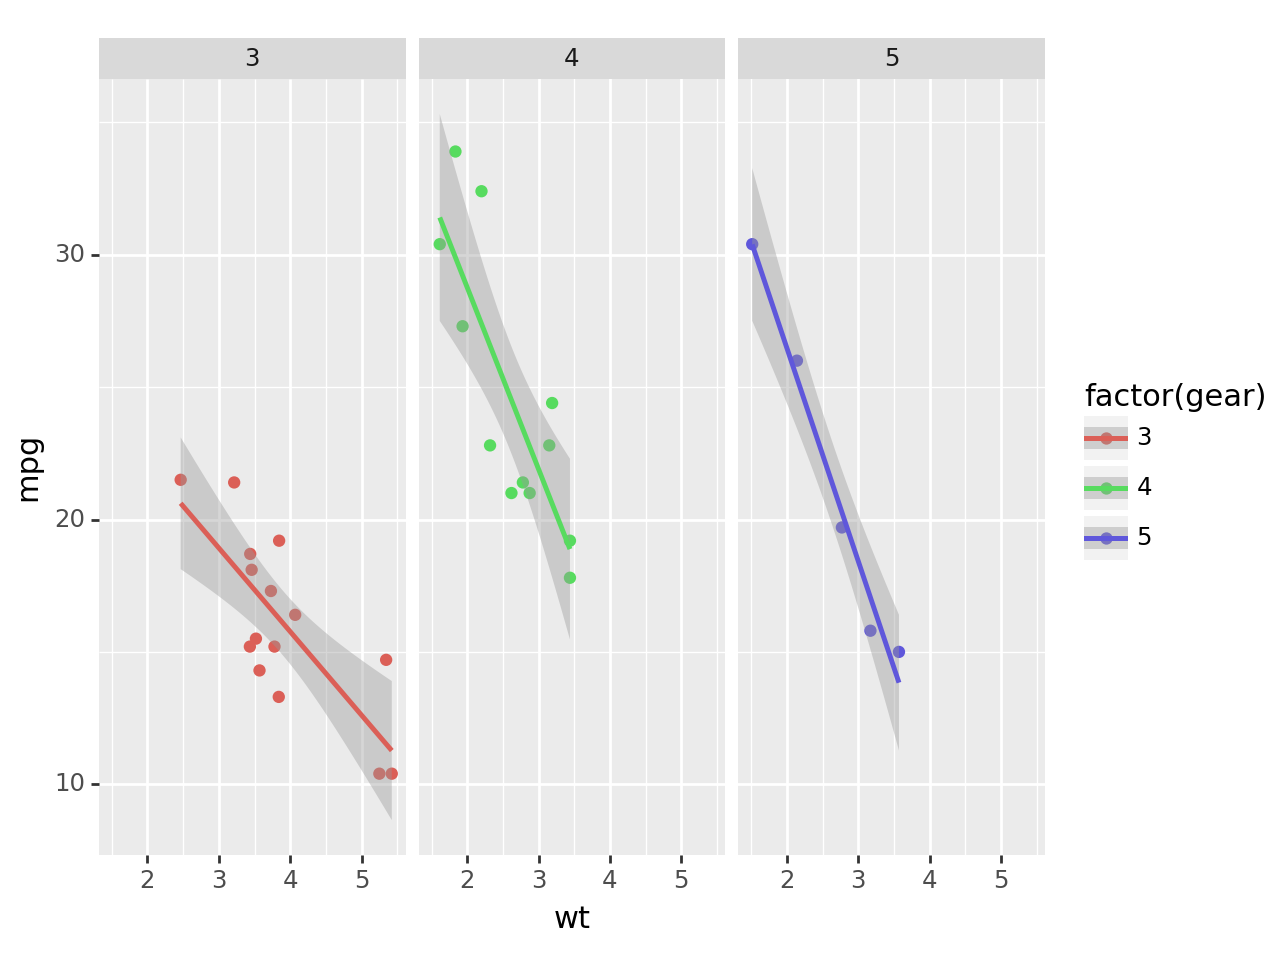

<Figure Size: (640 x 480)>

In [12]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(
    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
    + geom_point()
    + stat_smooth(method="lm")
    + facet_wrap("~gear")
)

/home/tbetton/Documents/Formation/preprocessing_visualization/venv_preprocessing/lib64/python3.11/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


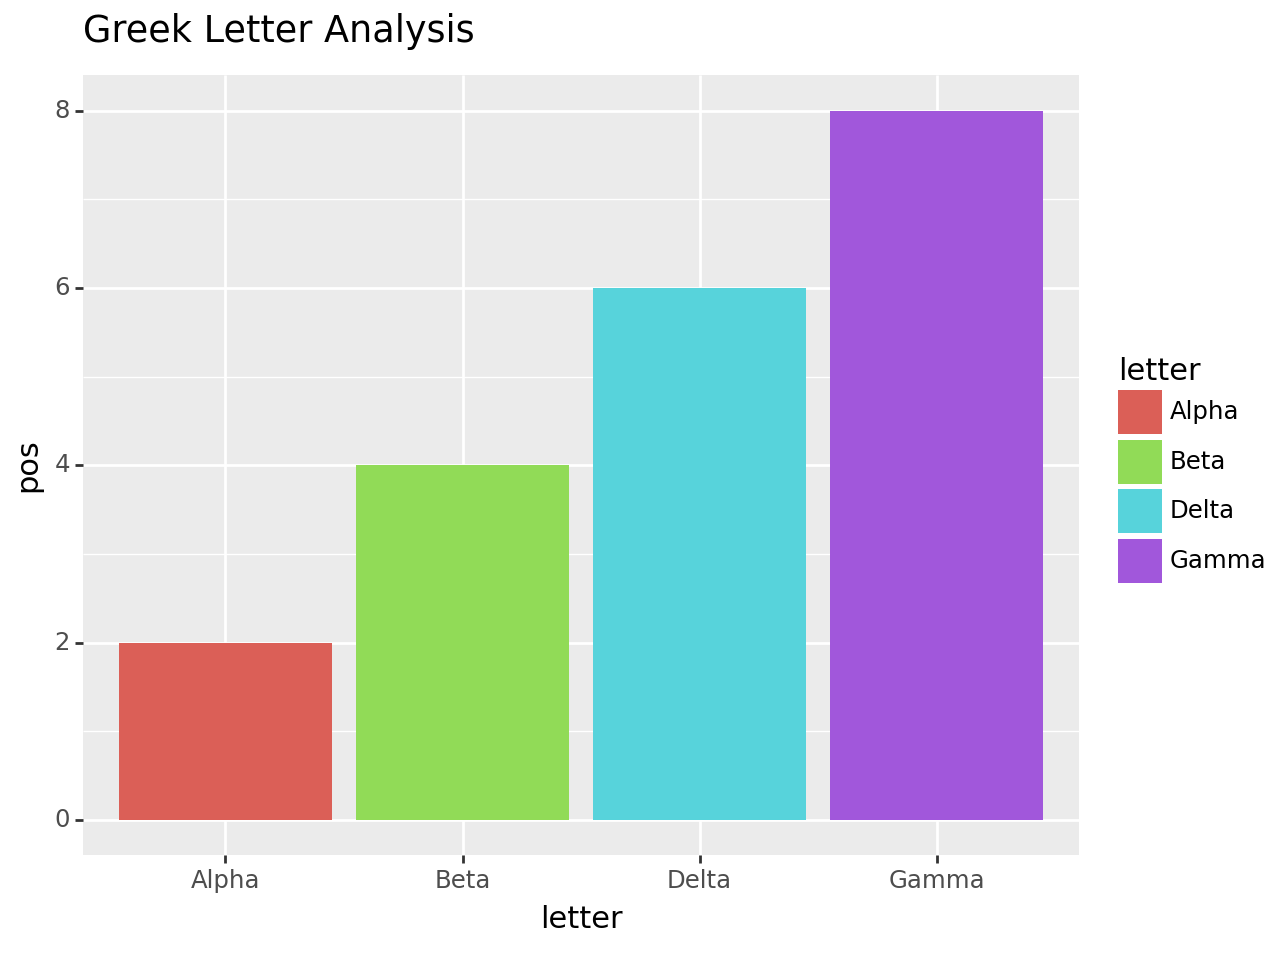

<Figure Size: (640 x 480)>

In [13]:
from plotnine import geom_line, scale_color_hue, ggtitle, geom_col
import pandas as pd

df2 = pd.DataFrame(
    {
        "letter": ["Alpha", "Beta", "Delta", "Gamma"] * 2,
        "pos": [1, 2, 3, 4] * 2,
    }
)

(
    ggplot(df2)
    + geom_col(aes(x="letter", y="pos", fill="letter"))
    + scale_color_hue(l=0.45)  # some contrast to make the lines stick out
    + ggtitle("Greek Letter Analysis")
)

## Pandas
(38.8K ⭐ on Github)

Pandas is also a plotting library which uses matplotlib as backend. It's easy to use because all you need to do is use the Pandas dataframe and there's **no need for any other imports** and you have a lot of plotting options.
However, **plots are not interactive and stay simple**.